<a href="https://colab.research.google.com/github/HarshaR99/Colab_python/blob/master/Data_Visualization_and_Linear_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression
Linear regression is one of the most basic forms of machine learning and is used to predict numeric values.

In this tutorial we will use a linear model to predict the survival rate of passangers from the titanic dataset.

Linear regression follows a very simple concept. If data points are related linearly, we can generate a line of best fit for these points and use it to predict future values.

"*Line of best fit* refers to a line through a scatter plot of data points that best expresses the relationship between those points."

In [0]:
!pip install -q sklearn

In [0]:
%tensorflow_version 2.x     # this is not required if not using a notebook

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x     # this is not required if not using a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output  # just for this notebook to clear the outbook
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

#Loading datasets

In [0]:
# df as in dataframe
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # the traning set
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # the testing dataset
y_train = dftrain.pop('survived') # poping the column which is the label to be determined and stroing it
y_eval = dfeval.pop('survived')  # same goes for training set
print(dfeval.head(3))

      sex   age  n_siblings_spouses  parch  ...  class     deck  embark_town alone
0    male  35.0                   0      0  ...  Third  unknown  Southampton     y
1    male  54.0                   0      0  ...  First        E  Southampton     y
2  female  58.0                   0      0  ...  First        C  Southampton     y

[3 rows x 9 columns]


To print the head or first 5 rows of dataset

---


Note : I have alreay popped the survived column in the loading dataset section

In [0]:
print(dftrain.head()) # can also pass parameters in head 

      sex   age  n_siblings_spouses  parch  ...  class     deck  embark_town alone
0    male  22.0                   1      0  ...  Third  unknown  Southampton     n
1  female  38.0                   1      0  ...  First        C    Cherbourg     n
2  female  26.0                   0      0  ...  Third  unknown  Southampton     y
3  female  35.0                   1      0  ...  First        C  Southampton     n
4    male  28.0                   0      0  ...  Third  unknown   Queenstown     y

[5 rows x 9 columns]


In [0]:
print(y_train)  

0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    0
Name: survived, Length: 627, dtype: int64


Note that the name of the column survived has also been removed from the data by the pop function

In [0]:
print(dftrain.loc[1],"\n y_train: ",y_train.loc[1]) # loc() function prints contents of specific row

sex                      female
age                          38
n_siblings_spouses            1
parch                         0
fare                    71.2833
class                     First
deck                          C
embark_town           Cherbourg
alone                         n
Name: 1, dtype: object 
 y_train:  1


In [0]:
print(dftrain['age'])  # to print an individual attr from 

0      22.0
1      38.0
2      26.0
3      35.0
4      28.0
       ... 
622    28.0
623    25.0
624    19.0
625    28.0
626    32.0
Name: age, Length: 627, dtype: float64


For statistical analysis of data we can use the describe function possibly only for numeric datatypes

In [0]:
dftrain.describe() 

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


shape of the dataset tensor,
we have 627 rows and 9 arrributes

In [0]:
dftrain.shape

(627, 9)

Visulaize data using histrograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6794894780>,
      dtype=object)

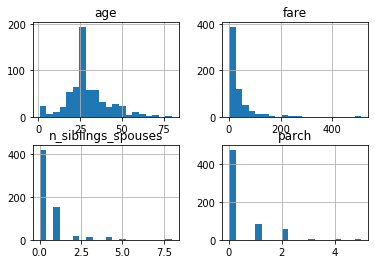

In [0]:
dftrain.hist(bins=20)

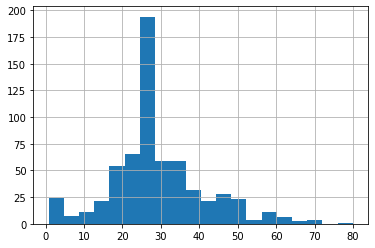

In [0]:
dftrain.age.hist(bins=20)

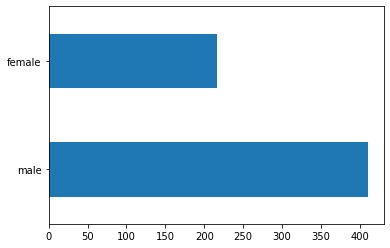

In [0]:
dftrain.sex.value_counts().plot(kind = 'barh')